Linear Regression

In [1]:
import pandas as pd

In [112]:
marketing = pd.read_excel('DirectMarketing.xlsx')

In [113]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [117]:
marketing2 = pd.get_dummies(marketing, drop_first = True)

In [118]:
marketing2.head()

,Salary,Children,Catalogs,AmountSpent,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium
0,47500,0,6,755,1,0,0,0,1,1,0,0
1,63600,0,6,1318,0,0,1,1,1,0,0,0
2,13500,0,18,296,0,1,0,1,1,0,1,0
3,85600,1,18,2436,0,0,1,0,0,0,0,0
4,68400,0,12,1304,0,0,0,0,1,0,0,0


In [148]:
marketing2.corr()['AmountSpent']

Salary            0.699596
Children         -0.222308
Catalogs          0.472650
AmountSpent       1.000000
Age_Old           0.113845
Age_Young        -0.434692
Gender_Male       0.201690
OwnHome_Rent     -0.350808
Married_Single   -0.475880
Location_Far      0.252616
History_Low      -0.489125
History_Medium   -0.143831
Name: AmountSpent, dtype: float64

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline



In [160]:
x = marketing2.Salary
y = marketing2.AmountSpent

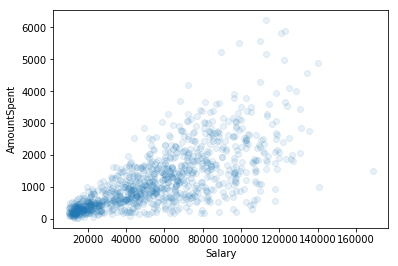

In [161]:
plt.scatter(x,y, alpha =0.1)
plt.xlabel("Salary")
plt.ylabel("AmountSpent")
plt.show()


In [162]:
import statsmodels.formula.api as smf

In [195]:
formula = 'AmountSpent ~ Salary +Catalogs + Children + Gender_Male'

In [196]:
lin_reg = smf.ols(formula, marketing2)

In [197]:
type(lin_reg)

statsmodels.regression.linear_model.OLS

In [198]:
results1 = lin_reg.fit()

In [199]:
type(results1)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [200]:
print(results1.params)

Intercept     -431.240038
Salary           0.020585
Catalogs        47.777527
Children      -200.990427
Gender_Male    -41.748981
dtype: float64


In [201]:
new_spent = {'Salary': 50000,
            'Children': 0,
            'Catalogs':10,
            'Gender_Male': 0}
             
             

In [202]:
print(results1.predict(new_spent))

0    1075.776908
dtype: float64


In [203]:
import numpy as np

In [204]:
min_x = np.min(x)
print(min_x)

10100


In [205]:
max_x = np.max(x)
print(max_x)

168800


In [212]:
x_points = np.linspace(min_x,max_x,100)

In [207]:
y_points = results1.params[0]+results1.params[1]*x_points

In [208]:
print(y_points)

[-223.33321955 -190.33510773 -157.33699591 -124.33888409  -91.34077227
  -58.34266045  -25.34454862    7.6535632    40.65167502   73.64978684
  106.64789866  139.64601048  172.6441223   205.64223412  238.64034594
  271.63845776  304.63656959  337.63468141  370.63279323  403.63090505
  436.62901687  469.62712869  502.62524051  535.62335233  568.62146415
  601.61957597  634.6176878   667.61579962  700.61391144  733.61202326
  766.61013508  799.6082469   832.60635872  865.60447054  898.60258236
  931.60069418  964.59880601  997.59691783 1030.59502965 1063.59314147
 1096.59125329 1129.58936511 1162.58747693 1195.58558875 1228.58370057
 1261.58181239 1294.57992421 1327.57803604 1360.57614786 1393.57425968
 1426.5723715  1459.57048332 1492.56859514 1525.56670696 1558.56481878
 1591.5629306  1624.56104242 1657.55915425 1690.55726607 1723.55537789
 1756.55348971 1789.55160153 1822.54971335 1855.54782517 1888.54593699
 1921.54404881 1954.54216063 1987.54027246 2020.53838428 2053.5364961
 2086.5

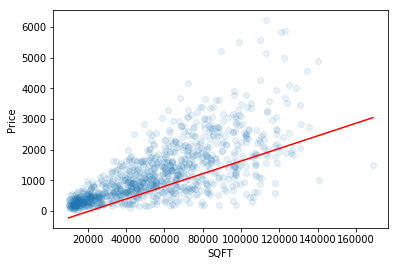

In [209]:
plt.scatter(x,y, alpha =0.1)
plt.plot(x_points, y_points,color = 'red')
plt.xlabel("SQFT")
plt.ylabel("Price")
plt.show()

In [211]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     480.4
Date:                Fri, 05 Apr 2019   Prob (F-statistic):          1.40e-230
Time:                        15:14:12   Log-Likelihood:                -7748.7
No. Observations:                1000   AIC:                         1.551e+04
Df Residuals:                     995   BIC:                         1.553e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -431.2400     54.680     -7.887      0.000    -538.541    -323.939
Salary          0.0206      0.001     33.534      0.000       0.019       0.022
Catalogs       47.7775      2.756     17.337      0.000      42.370      53.186
Children     -200.9904     17.207    -11.681      0.000    -234.756    -167.224
Gender_Male   -41.7490     37.152     -1.124      0.261    -114.655      31.157
==============================================================================
Omnibus:                      257.549   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              995.294
Skew:                           1.180   Prob(JB):                    7.49e-217
Kurtosis:                       7.279   Cond. No.                     2.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""